## 데이터 탐색

### 상관분석

In [1]:
### 데이터 불러오기

# 구글 서버와 내 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# 현재 작업 경로 이동
%cd '/content/drive/MyDrive/KDT/정형데이터분석시각화'

# 필요한 라이브러리 임폴트
import pandas as pd

# file 경로 설정
file_name = 'weather.csv'

# read_csv() 실행
df_weather = pd.read_csv(file_name)

# 결과 확인하기
df_weather

Mounted at /content/drive
/content/drive/MyDrive/KDT/정형데이터분석시각화


,temp,hum,atm,speed
0,17,34,1018,3.1
1,17,34,1018,3.1
2,17,34,1018,3.1
3,17,34,1018,3.1
4,17,34,1018,3.1
...,...,...,...,...
99995,9,71,1009,2.6
99996,9,71,1009,2.6
99997,9,71,1009,2.6
99998,9,71,1009,2.6


In [2]:
### 상관행렬(correlat matrix) 구하기
corr_matrix = df_weather.corr()

# 결과 확인하기
corr_matrix

,temp,hum,atm,speed
temp,1.000000,-0.461839,0.179666,-0.069841
hum,-0.461839,1.000000,-0.498329,-0.179915
atm,0.179666,-0.498329,1.000000,-0.330514
speed,-0.069841,-0.179915,-0.330514,1.000000


### 통계로 요약하기

#### 요약 통계량 구하기

In [3]:
### df.describe()
stat = df_weather.describe()
print(df_weather.describe())
print('-'*80)
print(f'요약 통계량의 자료형 = {type(stat)}')
print('-'*80)
print(f'요약 통계량의 인덱스 = {stat.index}')
print('-'*80)
print(f'요약 통계량의 컬럼 값 = {stat.columns}')
print('-'*80)
print('각 컬럼 별 사분위수 추출')
quantile = stat.iloc[4:7, :]
print(quantile)

                temp            hum            atm          speed
count  100000.000000  100000.000000  100000.000000  100000.000000
mean       16.909460      78.159290    1005.071590       3.315666
std         3.840548      21.021064       5.657643       1.915367
min         9.000000      17.000000     993.000000       0.500000
25%        15.000000      66.000000    1002.000000       1.500000
50%        16.000000      87.000000    1006.000000       3.100000
75%        19.000000      93.000000    1007.000000       4.600000
max        27.000000     100.000000    1028.000000      10.300000
--------------------------------------------------------------------------------
요약 통계량의 자료형 = <class 'pandas.core.frame.DataFrame'>
--------------------------------------------------------------------------------
요약 통계량의 인덱스 = Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')
--------------------------------------------------------------------------------
요약 통계량의 컬럼 값 =

#### 평균 구하기

In [4]:
### df.mean() 사용
mean = df_weather.mean()
print(mean)

temp       16.909460
hum        78.159290
atm      1005.071590
speed       3.315666
dtype: float64


#### 중앙값 구하기

In [5]:
### df.median() 사용
median = df_weather.median()
print(median)

temp       16.0
hum        87.0
atm      1006.0
speed       3.1
dtype: float64


#### 최소값 / 최대값 구하기

In [6]:
### 최소값 : df.min()
min = df_weather.min()
print(min)

temp       9.0
hum       17.0
atm      993.0
speed      0.5
dtype: float64


In [7]:
### 최대값 : df.max()
max = df_weather.max()
print(max)

temp       27.0
hum       100.0
atm      1028.0
speed      10.3
dtype: float64


#### 분산 구하기

In [8]:
### df.var() 사용
var = df_weather.var()
print(var)

temp      14.749810
hum      441.885116
atm       32.008925
speed      3.668631
dtype: float64


#### 표준편차 구하기

In [9]:
### df.std()
std = df_weather.std()
print(std)

temp      3.840548
hum      21.021064
atm       5.657643
speed     1.915367
dtype: float64


#### 최빈값 구하기

In [10]:
### df.mode()
mode = df_weather.mode()
print(mode)

   temp  hum   atm  speed
0    15   93  1006    3.1


In [11]:
### 각 컬럼 별 --> 항목 별 빈도수

# temp 컬럼
temp_count = df_weather.temp.value_counts()
print(temp_count)

print('-'*80)

# hum 컬럼
hum_count = df_weather.hum.value_counts()
print(hum_count)

print('-'*80)

# atm 컬럼
atm_count = df_weather.atm.value_counts()
print(atm_count)

print('-'*80)

# speed 컬럼
speed_count = df_weather.speed.value_counts()
print(speed_count)

15    20489
16    13123
18    10066
17     7728
19     7548
13     5752
12     5033
23     4314
24     4314
14     4020
20     3596
21     3595
9      3252
26     1618
10     1438
22     1418
25     1079
27      898
11      719
Name: temp, dtype: int64
--------------------------------------------------------------------------------
93     23186
100    15099
87      8513
82      7190
88      7190
77      4314
55      3595
66      2877
59      2876
62      2157
71      1813
69      1438
58      1438
48      1438
72      1438
64      1438
54       899
30       721
83       719
19       719
67       719
47       719
51       719
73       719
78       719
45       719
35       719
17       719
21       719
25       719
26       719
27       719
42       718
33       717
23       699
34       180
Name: hum, dtype: int64
--------------------------------------------------------------------------------
1006    17974
1007    12222
1005     7909
997      7010
1008     4315
1002     4314
1003     

### 시각적 데이터 탐색(EDA)

#### matplotlib.pyplot

##### 직선 그래프

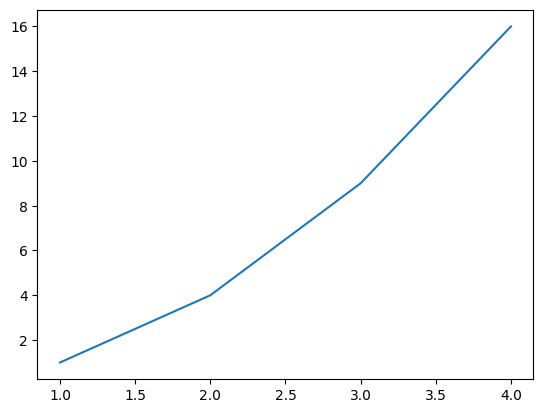

In [12]:
# 필요한 라이브러리 임폴트
import matplotlib.pyplot as plt

# 데이터 설정
x = [1, 2, 3, 4]
y = [1, 4, 9 ,16]

# 직선 그래프 --> plot(x, y)
plt.plot(x, y)

# 그래프 출력 --> 보여주라!!
plt.show()

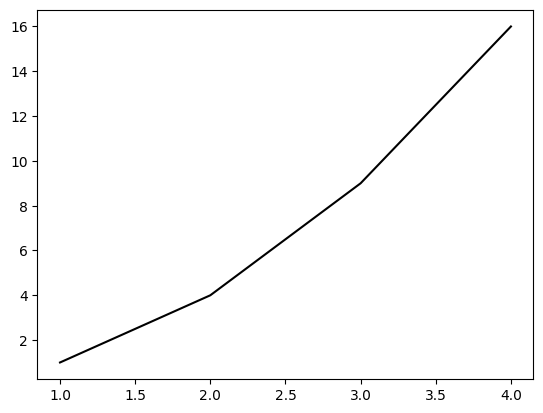

In [13]:
### 선의 색깔 지정

# 데이터 --> x, y 재활용

# plot() 사용 --> 직선 그래프 생성
# plt.plot(x, y, color = 'dodgerblue')
plt.plot(x, y, color = 'k')

# 그래프 출력
plt.show()

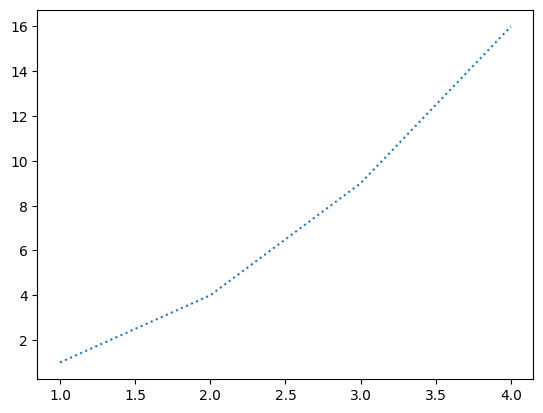

In [14]:
### 선의 모양(linestyle)

# 점선 : linestyle = '--'
# 선 + 점 : linestyle = '-.'

# 그래프 생성 --> plot(x, y, linestyle='--')
# plt.plot(x, y, linestyle='--')
# plt.plot(x, y, linestyle='-.')
plt.plot(x, y, linestyle=':')

# 그래프 출력
plt.show()

#### 4/3 실습

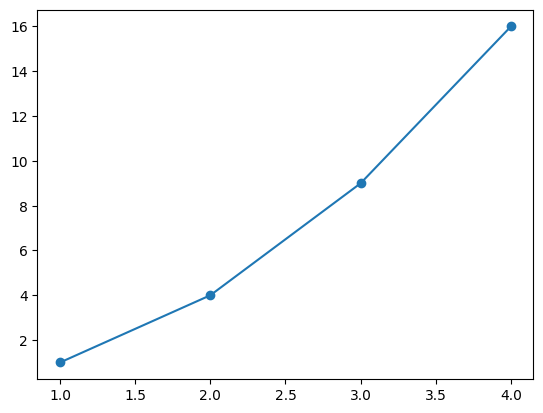

In [15]:
### marker 종류 --> 'o'

# 필요한 라이브러리 임폴트
import matplotlib.pyplot as plt

# 데이터 설정
x = [1, 2, 3, 4]
y = [1, 4, 9 ,16]

# 직선 그래프 생성
plt.plot(x, y, marker='o')

# 그래프 출력
plt.show()

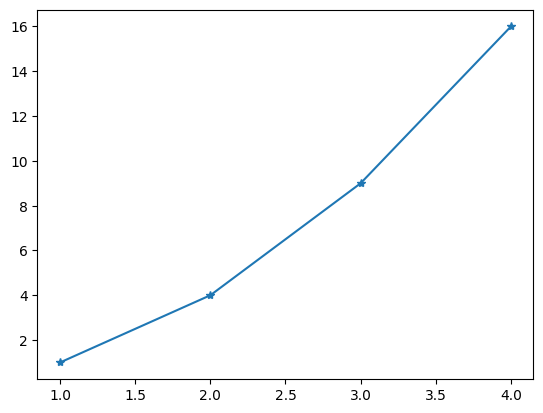

In [16]:
### marker 종류 --> '*'

# 그래프 생성
plt.plot(x, y, marker='*')

# 그래프 출력
plt.show()

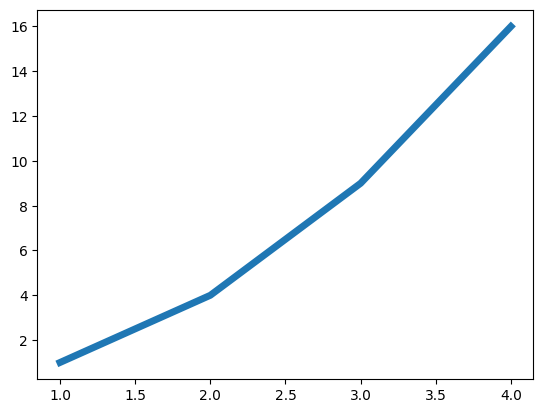

In [17]:
### 선의 굵기

# 그래프 생성
plt.plot(x, y, linewidth=5)

# 그래프 출력
plt.show()

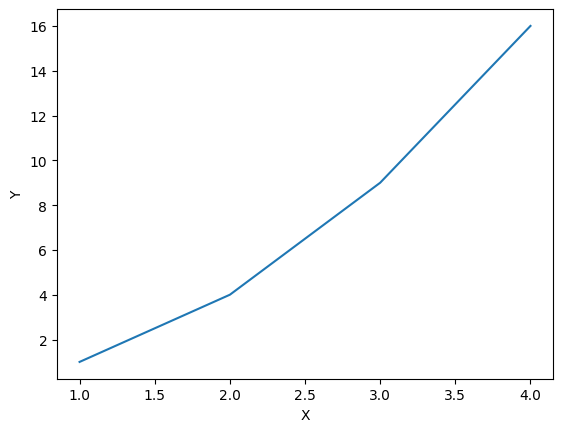

In [18]:
### 축 레이블 설정하기

# plt.xlabel() / plt.ylabel()

# 그래프 생성
plt.plot(x, y)

# 축 레이블 설정
plt.xlabel('X')
plt.ylabel('Y')

# 그래프 출력
plt.show()

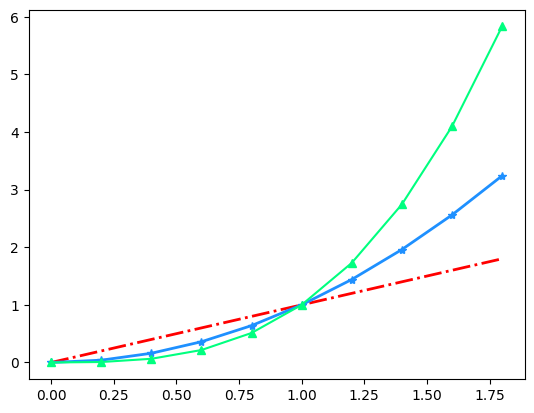

In [19]:
### 여러 곡선 그리기

# 숫자 연산을 위해서 넘파이 1차 배열을 생성
import numpy as np

arr = np.arange(0, 2, 0.2)

# 그래프 생성
plt.plot(arr, arr, color='r', linestyle='-.', linewidth=2)
plt.plot(arr, arr**2, color='dodgerblue', marker='*', linewidth=2)
plt.plot(arr, arr**3, color='springgreen', marker='^')

# 그래프 출력
plt.show()

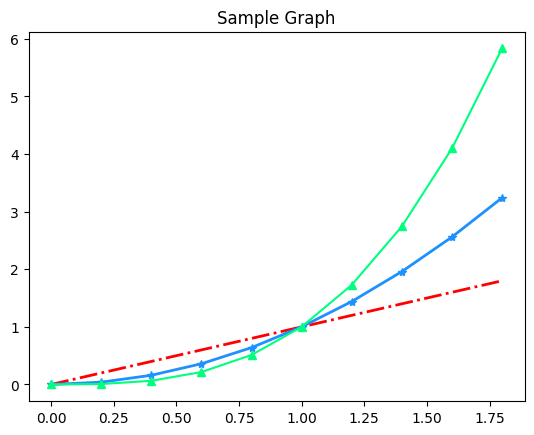

In [20]:
### 타이틀 설정하기

# plt.title("message")

arr = np.arange(0, 2, 0.2)

# 그래프 생성
plt.plot(arr, arr, color='r', linestyle='-.', linewidth=2)
plt.plot(arr, arr**2, color='dodgerblue', marker='*', linewidth=2)
plt.plot(arr, arr**3, color='springgreen', marker='^')

# 타이틀 설정
plt.title("Sample Graph")

# 그래프 출력
plt.show()

##### 막대 그래프

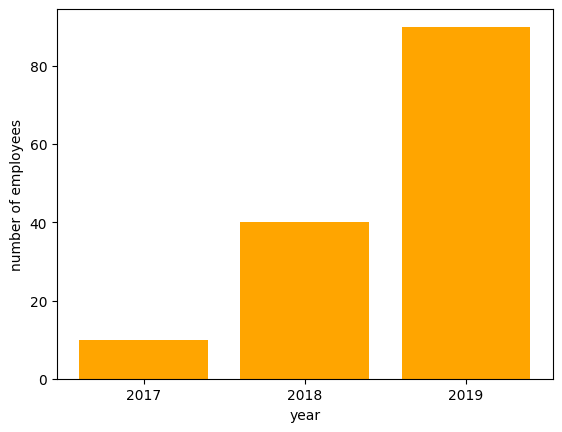

In [21]:
# 데이터 생성
year = ['2017', '2018', '2019']
num_employees = [10, 40, 90]

# bar() 함수 이용
plt.bar(year, num_employees, color='orange')

# 축 레이블 설정
plt.xlabel('year')
plt.ylabel('number of employees')

# 그래프 출력
plt.show()

##### 히스토그램(Histogram)

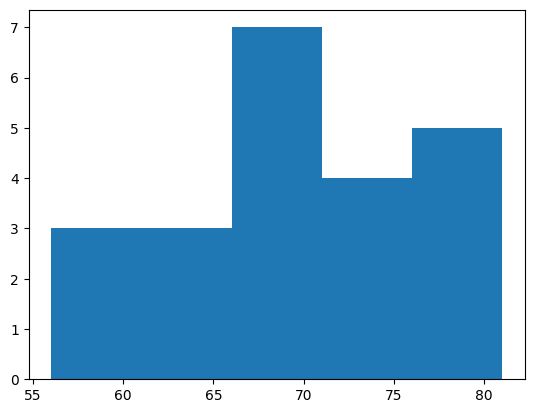

In [22]:
# 데이터 생성
weight = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71, 80, 59, 67, 81, 69, 73, 69, 74, 70, 65]

# hist() 사용 --> 그래프 생성
plt.hist(weight, bins=5)

# 그래프 출력
plt.show()

##### 원 그래프(Pie Chart)

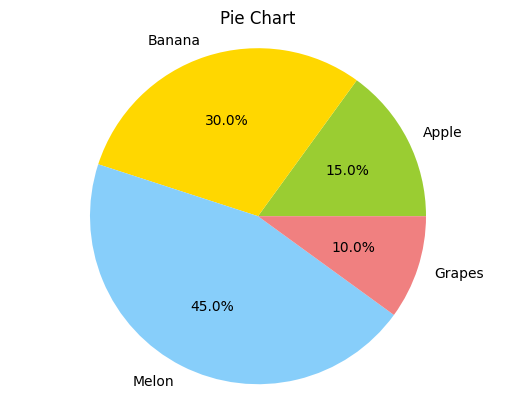

In [23]:
# 데이터 생성

ratio = [15, 30, 45, 10]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

# 타이틀 설정
plt.title("Pie Chart")

# 그래프 생성
plt.pie(x=ratio, labels=labels, colors=colors, autopct='%.1f%%')

# 그래프 출력
plt.axis('equal')
plt.show()

#### seaborn

##### 막대 그래프

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/KDT/정형데이터분석시각화
info 함수를 이용한 기본 정보 출력
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
--------------------------------------------------------------------------------
전체 데이터 출력 : 
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0        

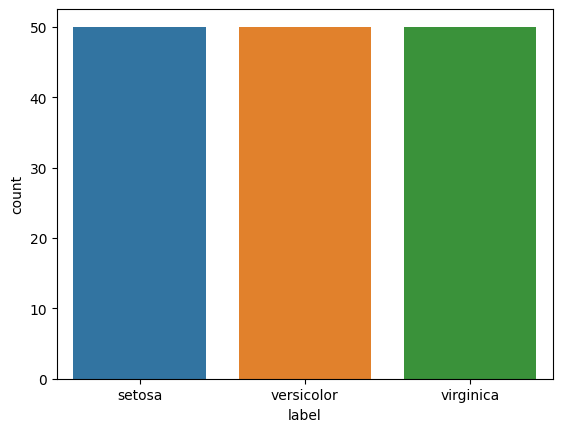

In [24]:
### sns.countplot(data, x, y, hue) 이용 --> iris dataset 이용

# 구글 서버와 내 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# 필요한 라이브러리 임폴트
import pandas as pd
import seaborn as sns

# 현재 작업 디렉토리 변경
%cd '/content/drive/MyDrive/KDT/정형데이터분석시각화'

# file 경로 설정
file_name = 'iris_dataset.csv'

# read_csv() 실행
df_iris = pd.read_csv(file_name)

# 결과 확인하기
print("info 함수를 이용한 기본 정보 출력")
df_iris.info()
print('-'*80)
print(f'전체 데이터 출력 : \n{df_iris}')

# 시각화 할 대상 컬럼
# x = df_iris.label

# 그래프 생성
sns.countplot(data=df_iris, x='label')

# 그래프 출력
plt.show()

##### 히스토그램(Histogram)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')
--------------------------------------------------------------------------------


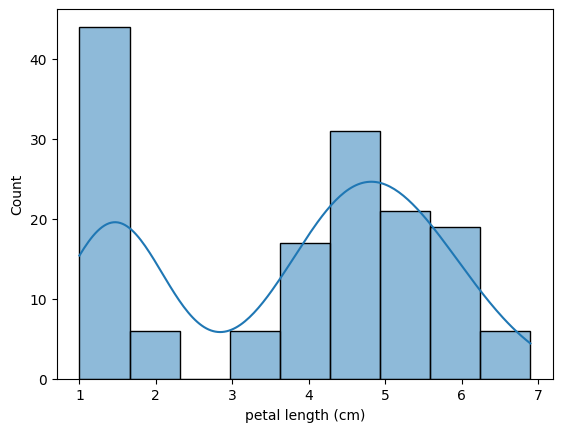

--------------------------------------------------------------------------------


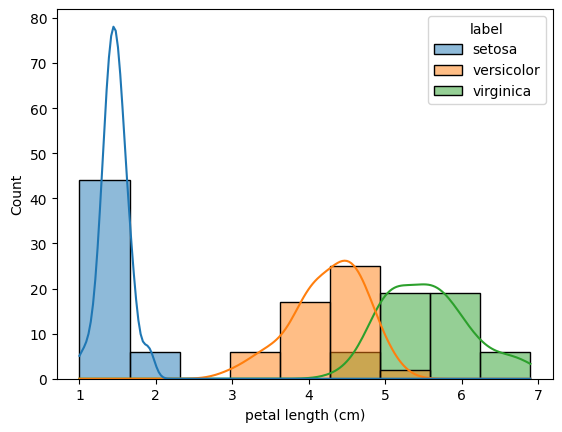

In [25]:
# iris dataset 컬럼 확인
columns = df_iris.columns
print(columns)

print('-'*80)

# 시각화 할 데이터 --> 'petal length (cm)'

# 그래프 생성
sns.histplot(data=df_iris, x='petal length (cm)', kde=True)

# 그래프 출력
plt.show()

print('-'*80)

# 그래프 생성 --> hue:'label'추가
sns.histplot(data=df_iris, x='petal length (cm)',hue='label', kde=True)

# 그래프 출력
plt.show()

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
--------------------------------------------------------------------------------


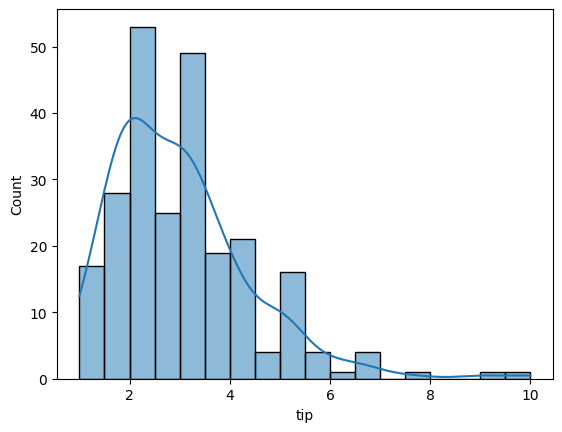

--------------------------------------------------------------------------------


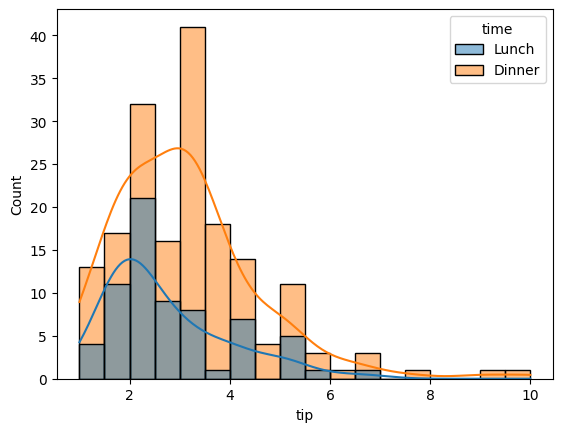

In [26]:
### seaborn --> tips 데이터

'''
1. seaborn에서 제공하는 데이터 : sns.load_dataset('tips')
2. tips 컬럼 설명
total_bill : 총 합계 요금표
tip : 팁
sex : 성별
smoker : 흡연자 여부
day : 요일
time : 식사 시간
size : 식사 인원
'''

# 데이터 생성
tips = sns.load_dataset('tips')
print(tips)

print('-'*80)

# tip 의 금액별 빈도수 --> histplot() 사용 --> hue(x)
sns.histplot(data=tips, x='tip', kde=True)
plt.show()

print('-'*80)

# tip 의 금액별 빈도수 --> histplot() 사용 --> hue(o)
sns.histplot(data=tips, x='tip', kde=True, hue='time')
plt.show()

##### 박스 플롯(Box plot)

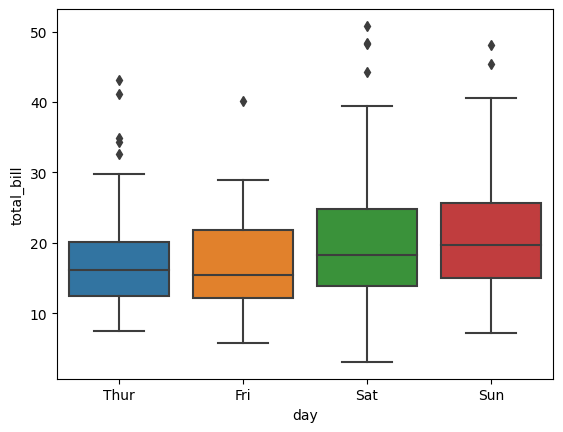

--------------------------------------------------------------------------------


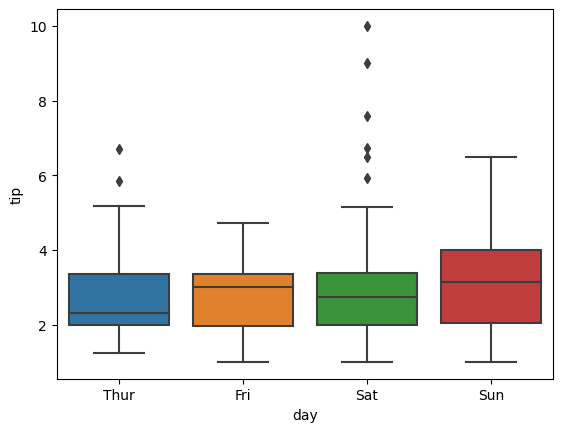

In [27]:
### seaborn.boxplot() 이용

# 사용할 데이터 --> tips

# 요일별 요금 총합의 관계를 시각화
sns.boxplot(data=tips, x='day', y='total_bill')
plt.show()

print('-'*80)

# 요일별 tip의 관계 시각화
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

##### 산점도 그래프(Scatter plot)

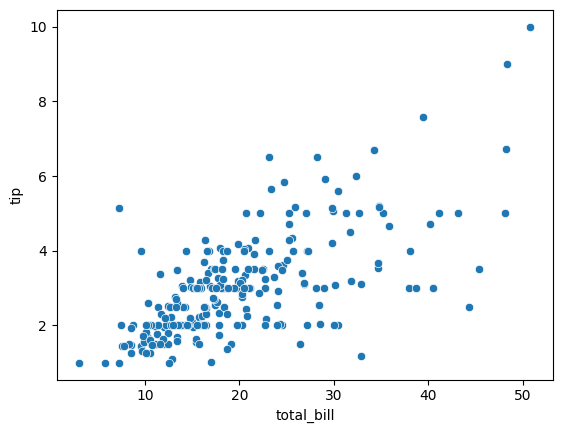

--------------------------------------------------------------------------------


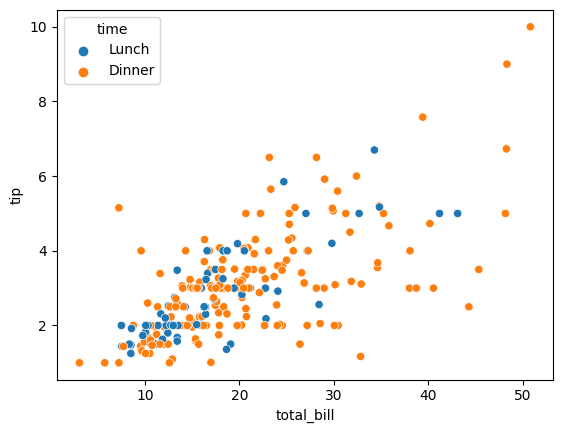

In [28]:
### sns.scatterplot() 이용

# 데이터 --> tips

# 요금 총합과 팁의 관계 시각화
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

print('-'*80)

# 요금 총합과 팁의 관계 시각화 + time 추가
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
plt.show()


##### heatmap

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000
--------------------------------------------------------------------------------


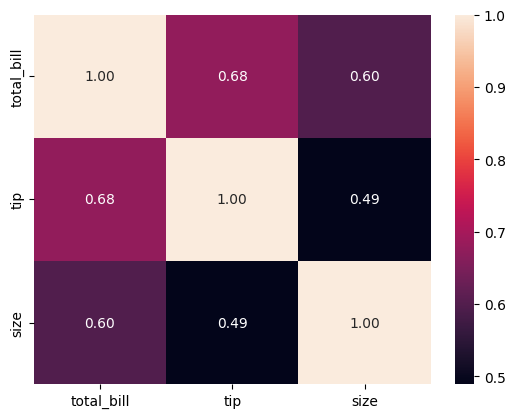

In [29]:
### sns.heatmap() 함수 사용

# 사용 데이터 --> tips

# tips --> 숫자 컬럼들 간의 상관계수 측정 --> 상관 행렬 추출
corr_matrix = tips.corr(method='pearson')

# 결과 확인하기
print(corr_matrix)

print('-'*80)

# heatmap() --> 상관 관계 시각화
sns.heatmap(data=corr_matrix, annot=True, fmt='.2f')
plt.show()

##### lmplot

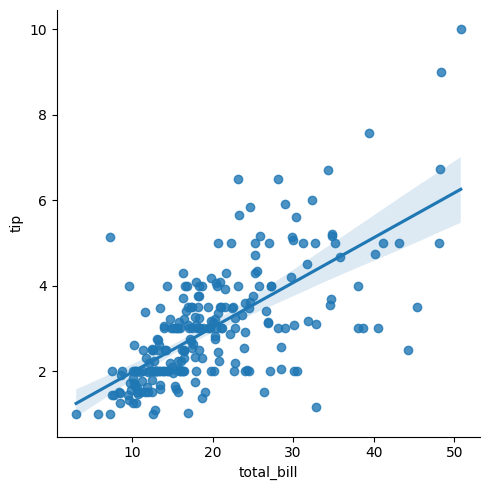

--------------------------------------------------------------------------------


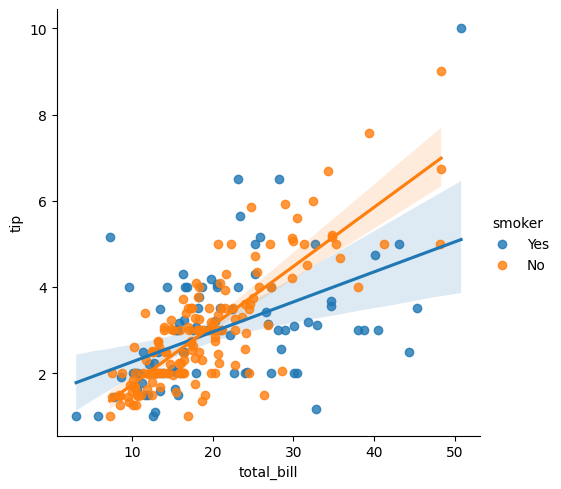

In [32]:
# 사용 데이터 --> tips

'''
1. scatterplot() --> 요금 종합과 팁의 상관 관계 분석
2. lmplot : scatterplot() + 선형 회귀 직선
'''

sns.lmplot(data=tips, x='total_bill', y='tip')
plt.show()

print('-'*80)

sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker')
plt.show()

#### pandas 이용

2017    10
2018    40
2019    90
dtype: int64
--------------------------------------------------------------------------------


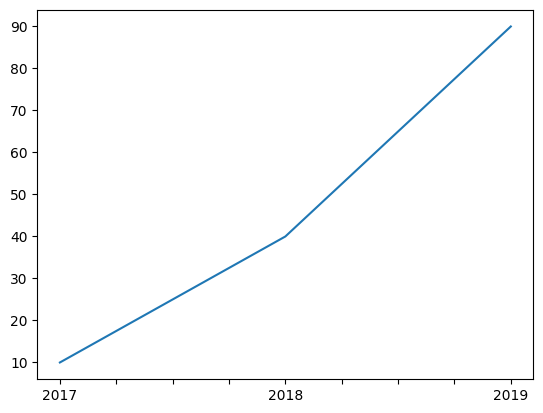

--------------------------------------------------------------------------------


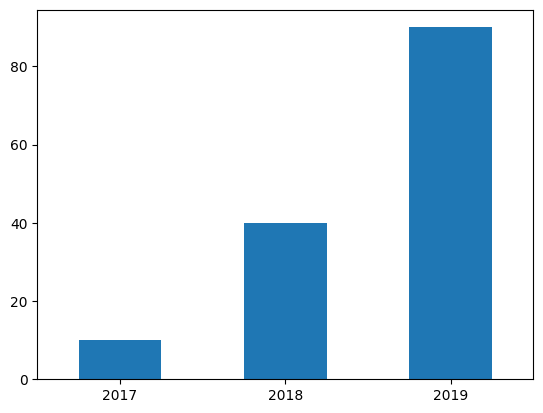

--------------------------------------------------------------------------------


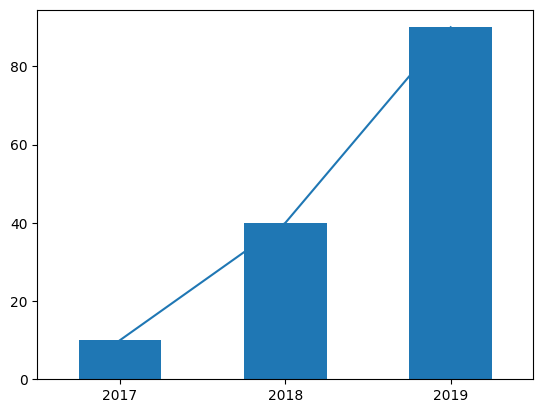

In [45]:
### pandas의 시각화 기능(1) --> Series 자료형 시각화

'''
### pandas 시각화 기능 정리
1. 대상 : Series 자료형
2. index 기준으로 값을 시각화 : x축 --> index
3. 변수명.plot(kind='bar')
'''

# 데이터 생성
year = ['2017', '2018', '2019']
num_employees = [10, 40 ,90]

# Series 자료형 생성
myseries = pd.Series(data=num_employees, index=year)

# Series 자료형 생성 결과 확인
print(myseries)

print('-'*80)

# 직선 그래프
myseries.plot(kind='line')
plt.show()

print('-'*80)

# 막대 그래프
myseries.plot(kind='bar', rot=0)
plt.show()

print('-'*80)

# 직선 그래프와 막대 그래프 --> 동시에 그리기(겹쳐서 그리기)
myseries.plot(kind='line')
myseries.plot(kind='bar', rot=0)
plt.show()

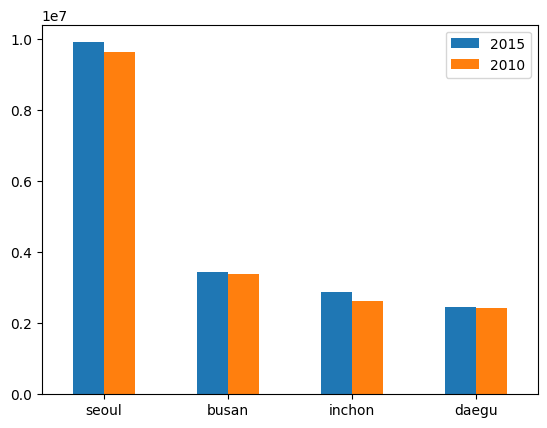

In [47]:
### pandas의 시각화 기능(2) --> DataFrame 자료형 시각화

'''
1. x축 : index
2. y축 : 각 컬럼의 값
3. df.plot(kind='bar', rot=0)
'''

# 데이터 생성하기
data =  {'2015':[9904312,3448737,2890451,2466052],
         '2010':[9631482,3393191,2632035,2431774]}

index = ['seoul', 'busan', 'inchon', 'daegu']

# DataFrame 자료형 생성
df = pd.DataFrame(data=data, index=index)

# pandas 시각화 기능 이용
df.plot(kind='bar', rot=0)

# 그래프 출력
plt.show()

##### value_counts(normalize=True)

In [54]:
### value_counts(normalize=True) --> 범주형 데이터 --> 컬럼 --> 항목별 비율 추출

# 사용 데이터 --> tips
print(tips)

print('-'*80)

# day 컬럼의 항목별 개수 구하기
day_counts = tips.day.value_counts()
print(f'day 컬럼의 항목별 개수 : \n{day_counts}')

print('-'*80)

# day 컬럼의 항목별 비율 추출
day_ratio = tips.day.value_counts(normalize=True)
print(f'day 컬럼의 항목별 비율 : \n{day_ratio}')

print('-'*80)

# quiz : time 컬럼의 항목별 비율 구하기
time_ratio = tips.time.value_counts(normalize=True)
print(f'time 컬럼의 항목별 비율 : \n{time_ratio}')

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
--------------------------------------------------------------------------------
day 컬럼의 항목별 개수 : 
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
--------------------------------------------------------------------------------
day 컬럼의 항목별 비율 : 
Sat     0.356557
Sun     0

##### apply()

In [58]:
# dataframe 자료형 생성
data = {'A':[4,1,5], 'B':[9,4,6]}
df = pd.DataFrame(data=data)
print(df)

print('-'*80)

# plus_one 함수 정의
def plus_one(x):
    return x+1

# dataframe --> apply(func)
df = df.apply(plus_one) 
print(df)

print('-'*80)

# 특정 컬럼 --> apply(func) 적용하기
df['A'] = df['A'].apply(plus_one)
print(df)

   A  B
0  4  9
1  1  4
2  5  6
--------------------------------------------------------------------------------
   A   B
0  5  10
1  2   5
2  6   7
--------------------------------------------------------------------------------
   A   B
0  6  10
1  3   5
2  7   7


##### apply() + lambda()

In [61]:
# 사용 데이터 --> apply() 적용 --> 결과값 df
print(df)

print('-'*80)

# dataframe --> apply(lambda) 적용
df = df.apply(lambda x : x + 1)
print(df)

print('-'*80)

# 특정 컬럼 --> apply(lambda) 적용
df['A'] = df['A'].apply(lambda x : x + 1)
print(df)

   A   B
0  7  11
1  4   6
2  8   8
--------------------------------------------------------------------------------
   A   B
0  8  12
1  5   7
2  9   9
--------------------------------------------------------------------------------
    A   B
0   9  12
1   6   7
2  10   9
